In [2]:
from sklearn import cross_validation, model_selection, linear_model, tree, ensemble
from sklearn.datasets import load_digits

import numpy as np
import pandas as pd

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Load data
digits = load_digits()
X = digits.data
y = digits.target

In [5]:
# Оценка качества
lasso = linear_model.Lasso()
val_cross_score = model_selection.cross_val_score(lasso, X, y, cv = 10)
print val_cross_score.mean()

0.423640007073


In [6]:
# task - 1, Create a DecisionTreeClassifier with the default
# settings and measure the quality

estimator_DTC = tree.DecisionTreeClassifier()
cross_score_DTC = model_selection.cross_val_score(estimator_DTC, X, y, cv = 10)
ans1 = cross_score_DTC.mean()
print ans1

0.833098485775


In [7]:
with open('ans1.txt', 'w') as file_out:
        file_out.write(str(ans1))

In [8]:
# task - 2 
bagging = ensemble.BaggingClassifier (estimator_DTC,n_estimators=100)#learning,tree
cross_score_badding = model_selection.cross_val_score(bagging, X, y, cv = 10,n_jobs = 6)
ans2 = cross_score_badding.mean()
print ans2

0.921574884943


In [9]:
with open('ans2.txt', 'w') as file_out:
        file_out.write(str(ans2))

In [10]:
# task - 3 
d = int(np.sqrt(X.shape[1]))
bagging_2 = ensemble.BaggingClassifier(estimator_DTC,n_estimators=100, max_features = d)#learning,tree
cross_score_badding_2 = model_selection.cross_val_score(bagging_2, X, y, cv = 10,n_jobs = 6)
ans3 = cross_score_badding_2.mean()
print ans3

0.928183695662


In [11]:
with open('ans3.txt', 'w') as file_out:
        file_out.write(str(ans3))

In [12]:
# task - 4
estimator_DTC = tree.DecisionTreeClassifier(max_features = d)
bagging_3 = ensemble.BaggingClassifier(estimator_DTC,n_estimators=100)#learning,tree
cross_score_badding_3 = model_selection.cross_val_score(bagging_3, X, y, cv = 10,n_jobs = 6)
ans4 = cross_score_badding_3.mean()
print ans4

0.956608454456


In [13]:
with open('ans4.txt', 'w') as file_out:
        file_out.write(str(ans4))

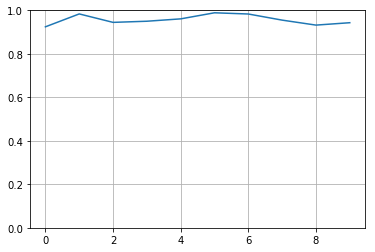

In [14]:
pylab.grid(True)
pylab.ylim((0., 1.))
pylab.plot(cross_score_badding_3)

In [15]:
random_forest = ensemble.RandomForestClassifier(max_depth = 15,random_state = 1)#learning,tree
cross_score_random = model_selection.cross_val_score(random_forest, X, y, cv = 10,n_jobs = 6)
ans5 = cross_score_random.mean()
print ans5

0.919929754031


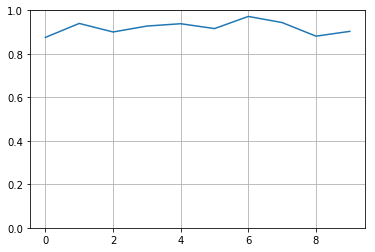

In [16]:
pylab.grid(True)
pylab.ylim((0., 1.))
pylab.plot(cross_score_random)

In [17]:
# task - 6
trees = 1 + np.arange(0,100,5)
res_val_trees = []
for i in trees:
    random_forest = ensemble.RandomForestClassifier(max_depth = 5,random_state = 1,n_estimators = i)#learning,tree
    cross_score_random = model_selection.cross_val_score(random_forest, X, y, cv = 10,n_jobs = 6)
    res_val_trees.append(cross_score_random)

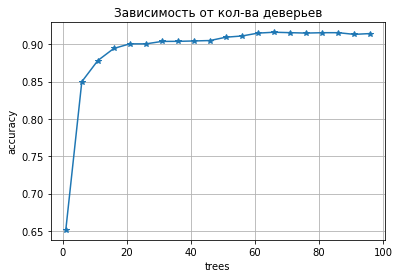

In [18]:
pylab.grid(True)
pylab.plot(trees,np.asmatrix(res_val_trees).mean(axis=1),marker='*')
pylab.title(u'Зависимость от кол-ва деверьев')
pylab.xlabel('trees')
pylab.ylabel('accuracy')

In [19]:
d2 = X.shape[1]
res_val_features = []
for i in np.arange(0.1,1.1,0.1):
    random_forest = ensemble.RandomForestClassifier(max_depth = 5,random_state = 1,n_estimators = 60,max_features = int(i * d2))#learning,tree
    cross_score_random = model_selection.cross_val_score(random_forest, X, y, cv = 10,n_jobs = 6)
    res_val_features.append(cross_score_random)

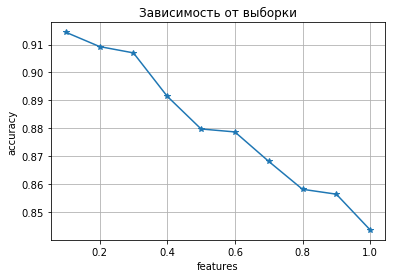

In [20]:
pylab.grid(True)
pylab.plot(np.arange(0.1,1.1,0.1),np.asmatrix(res_val_features).mean(axis=1),marker='*')
pylab.title(u'Зависимость от выборки')
pylab.xlabel('features')
pylab.ylabel('accuracy')

In [21]:
random_forest = ensemble.RandomForestClassifier(max_depth = 15,random_state = 1,n_estimators = 60)#learning,tree
cross_score_random = model_selection.cross_val_score(random_forest, X, y, cv = 10,n_jobs = 6)
cross_score_random.mean()

0.95668140849751171

In [24]:
ans5 = '2 3 4 7'
with open("ans5.txt", "w") as fout:
    fout.write(str(ans5))